In [3]:
# 1. Generate noisy data sample from the linear function y = 3x + 4
import numpy

numSamples = 100
X = numpy.random.rand(numSamples, 1)
y = 4 + 3*X
noise = numpy.random.randn(numSamples, 1)
y_withNoise = y + noise

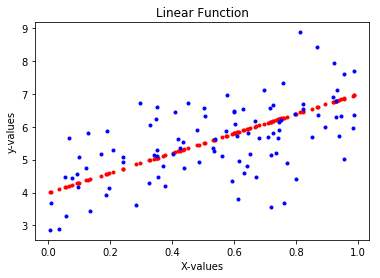

In [4]:
# 2. Visualize our data
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(X, y, "r.")
plt.plot(X, y_withNoise, "b.")
plt.xlabel('X-values')
plt.ylabel('y-values')
plt.title('Linear Function')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_withNoise, test_size = 0.3, random_state = 42)
print('Number samples in training:', len(X_train))
print('Number samples in testing:', len(y_test))

Number samples in training: 70
Number samples in testing: 30


In [6]:
from sklearn import linear_model

lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
print("Slope/Coefficient:", lr_model.coef_)
print("Intercept: ", lr_model.intercept_)

Slope/Coefficient: [[2.10597657]]
Intercept:  [4.43769303]


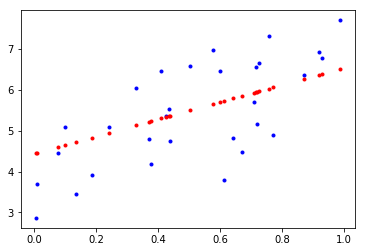

In [7]:
# 6. Visualize predicted and actual value

y_predicted = lr_model.intercept_ + lr_model.coef_*X_test

plt.plot(X_test, y_test, "b.")
plt.plot(X_test, y_predicted, "r.")

In [8]:
# Evaluate model performance on the test dataset
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_predicted)

0.8016642606100375

In [9]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_predicted)

0.8701422641966065

In [10]:
error = y_predicted - y_test
print(error)

[[-0.44169403]
 [ 1.04746654]
 [ 0.14818158]
 [ 1.15412187]
 [-0.75115934]
 [ 0.79813745]
 [ 0.76865084]
 [-0.01974613]
 [ 0.23133836]
 [ 0.61220772]
 [-0.54408885]
 [ 1.58702579]
 [-0.09487019]
 [ 1.36366498]
 [-1.29502646]
 [-1.15991468]
 [-1.32629503]
 [ 1.27208954]
 [ 0.90913377]
 [ 0.41373589]
 [-0.91467588]
 [-0.1845921 ]
 [-0.3930895 ]
 [-1.08650036]
 [ 1.93031206]
 [-0.61536555]
 [-0.68414553]
 [-1.18929573]
 [ 0.9712529 ]
 [-0.14214917]]


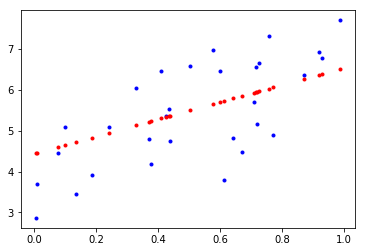

In [11]:
ridge_model = linear_model.Ridge(alpha = 0.3)
ridge_model.fit(X_train, y_train)
ridge_predicted = ridge_model.predict(X_test)

plt.plot(X_test, y_test, "b.")
plt.plot(X_test, y_predicted, "r.")

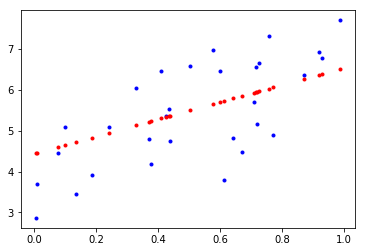

In [12]:
lasso_model = linear_model.Lasso(alpha = 0.2)
lasso_model.fit(X_train, y_train)
lasso_predicted = lasso_model.predict(X_test)

plt.plot(X_test, y_test, "b.")
plt.plot(X_test, y_predicted, "r.")

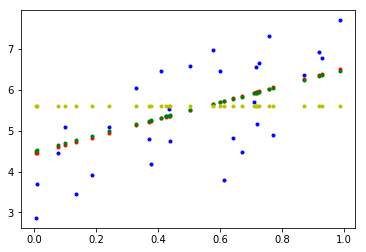

In [13]:
plt.plot(X_test, y_test, "b.")
plt.plot(X_test, y_predicted, "r.")
plt.plot(X_test, ridge_predicted, "g.")
plt.plot(X_test, lasso_predicted, "y.")

In [16]:
# polynomial
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)
print(X.shape)
print(X_poly.shape)

(100, 1)
(100, 2)


In [17]:
X_polyTrain, X_polyTest, y_polyTrain, y_polyTest = train_test_split(X_poly, y_withNoise, random_state = 42)
poly_model = linear_model.LinearRegression()
poly_model.fit(X_polyTrain, y_polyTrain)
y_polyPredicted = poly_model.predict(X_polyTest)

In [18]:
from sklearn.datasets import load_boston

boston_data = load_boston()
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [19]:
print(boston_data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [20]:
X_real = boston_data.data
y_real = boston_data.target


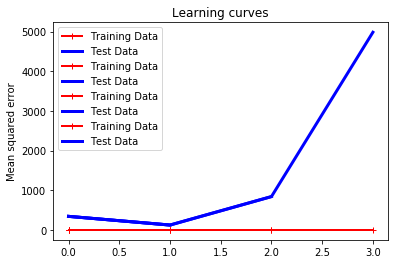

In [23]:
def plot_learning_curves(model, x, y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)
    train_errors, test_errors = [], []
    for m in range(1, 5): #len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        test_errors.append(mean_squared_error(y_test_predict, y_test))
        plt.plot(train_errors, "r-+", linewidth = 2, label = "Training Data")
        plt.plot(test_errors, "b-", linewidth = 3, label = "Test Data")
        plt.ylabel("Mean squared error")
        plt.title("Learning curves")
        plt.legend()
        
linear_reg_model = linear_model.LinearRegression()
plot_learning_curves(linear_reg_model, X_real, y_real)